# Numerical results

### Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from scipy.io import loadmat

import time
import h5py
import os

from functions_2D_FVM_SWE import *

# 1D Dam-break problem

In [25]:
# Load the .mat file
mat_data = loadmat('data/dambreakdata.mat')

h_sol = mat_data['h']
u_sol = mat_data['u']

h_sol = np.array(h_sol[0, :])
u_sol = np.array(u_sol[0, :])

# Load the numerical solution
mat_data = loadmat('data/1D-dam-break-verification.mat')

q = mat_data['q'] 
x = mat_data['x']

h_num = q[0, :]
hu_num = q[1, :]

# Initial conditions
N = 200 # Number of grid points
L = 50 # Length of the domain
x = np.linspace(0, L, N)

# Initial conditions
g = 9.81

hl = 3.5
hr = 1.25
h = np.where(x < 20, hl, hr)


In [3]:
if 0:    
    N = 1000 # Number of grid points
    L = 50 # Length of the domain
    x = np.linspace(0, L, N)

    # Initial conditions
    g = 9.81

    hl = 3.5
    hr = 1.25
    h = np.where(x < 20, hl, hr)


    # Plot initial conditions
    plt.figure(figsize=(10, 6))

    plt.plot(x, h)
    plt.xlabel('Distance x (m)')
    plt.ylabel('Water height h (m)')
    plt.title('Initial conditions for the water height h (m)')
    plt.grid()

    if 0:
        plt.savefig('plots/dam_break_initial_conditions.pdf', format='pdf')

    plt.show()


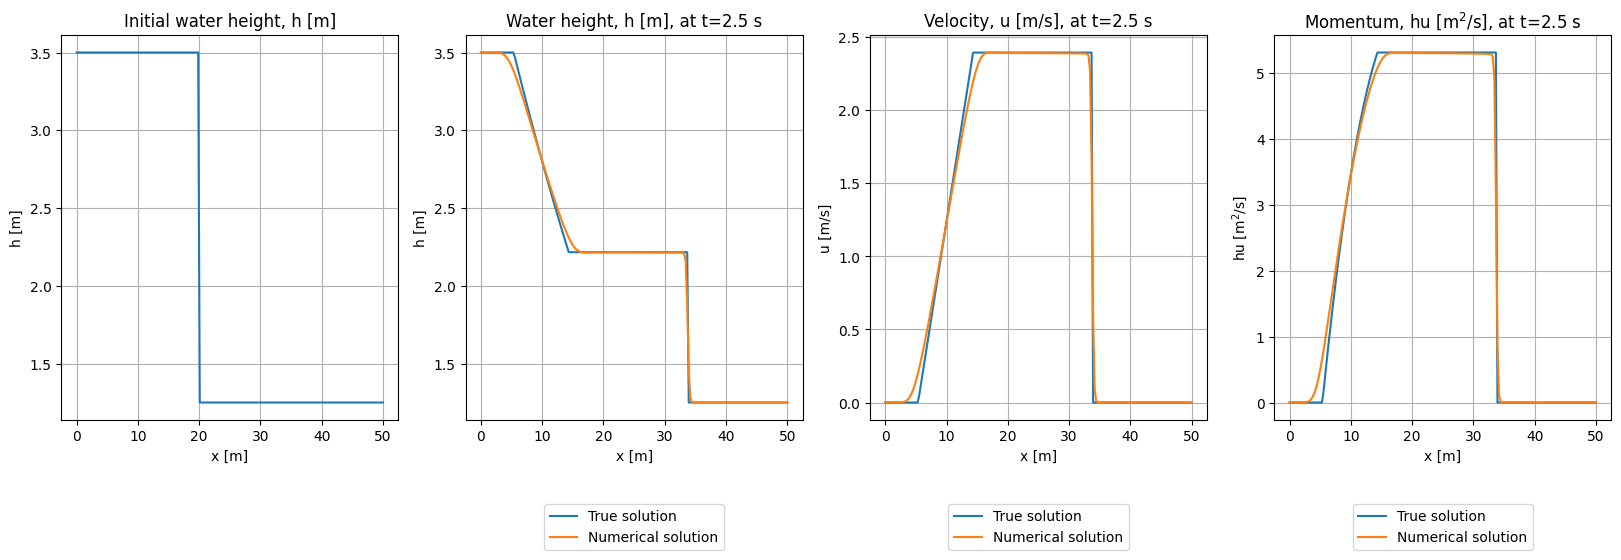

In [26]:
save = 1

# Plot the numerical solution
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.plot(x, h)
plt.xlabel('x [m]')
plt.ylabel('h [m]')
plt.grid()
plt.title('Initial water height, h [m]')

plt.subplot(1, 4, 2)
plt.plot(x, h_sol, label='True solution')
plt.plot(x, h_num, label='Numerical solution')
plt.xlabel('x [m]')
plt.ylabel('h [m]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.grid()
plt.title('Water height, h [m], at t=2.5 s')

plt.subplot(1, 4, 3)
plt.plot(x, u_sol, label='True solution')
plt.plot(x, hu_num/h_num, label='Numerical solution')
plt.xlabel('x [m]')
plt.ylabel('u [m/s]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.grid()
plt.title('Velocity, u [m/s], at t=2.5 s')

plt.subplot(1, 4, 4)
plt.plot(x, u_sol*h_sol, label='True solution')
plt.plot(x, hu_num, label='Numerical solution')
plt.xlabel('x [m]')
plt.ylabel(r'hu [m$^2$/s]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.grid()
plt.title(r'Momentum, hu [m$^2/$s], at t=2.5 s')

# Save figure
if save:
    plt.savefig('plots/sol_1D_val.pdf', format='pdf', bbox_inches='tight')

plt.show()


# Toro test cases

In [100]:
# FLUX CHOICE
# 1--> Godunov method with exact Rieamnn problem
# 2--> Lax-Friedrichs
# 3--> Lax-Wendroff
# 4--> FORCE
# 5--> HLL

save = 1

## Plotting functions

def plot_initial_data(x, h, u, save, filename):

    # Plot the initial data
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(x, h)
    plt.grid()
    plt.ylabel('h [m]')
    plt.xlabel('x [m]')
    plt.title('Initial water height, h [m]')

    plt.subplot(1, 2, 2)
    plt.plot(x, u)
    plt.grid()
    plt.ylabel('u [m/s]')
    plt.xlabel('x [m]')
    plt.title('Initial velocity, u [m/s]')

    plt.tight_layout()
    
    # Save figure
    if save:
        plt.savefig(filename, format='pdf')

    plt.show()

def plot_final_data(xc, xexact, h_GOD, h_LF, h_LW, h_FORCE, h_HLL, hexact, u_GOD, u_LF, u_LW, u_FORCE, u_HLL, uexact, tend, save, filename):
    # Plot the final data
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    if h_GOD is not None:
        plt.plot(xc[0,:], h_GOD[0,:], 'o', markersize = 2, label='Godunov')
    if h_LF is not None:
        plt.plot(xc[0,:], h_LF[0,:], 'o', markersize = 2, label='LF')
    if h_LW is not None:
        plt.plot(xc[0,:], h_LW[0,:], 'o', markersize = 2, label='LW')
    if h_FORCE is not None:
        plt.plot(xc[0,:], h_FORCE[0,:], 'o', markersize = 2, label='FORCE')
    if h_HLL is not None:
        plt.plot(xc[0,:], h_HLL[0,:], 'o', markersize = 2, label='HLL')
        
    plt.plot(xexact[0, :], hexact[0, :], label='True solution')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
    plt.grid()
    plt.ylabel('h [m]')
    plt.xlabel('x [m]')
    plt.title(f'Water height, h [m], at t = {tend} s')

    plt.subplot(1, 2, 2)
    if u_GOD is not None:
        plt.plot(xc[0,:], u_GOD[0,:], 'o', markersize = 2, label='Godunov')
    if u_LF is not None:
        plt.plot(xc[0,:], u_LF[0,:], 'o', markersize = 2, label='LF')
    if u_LW is not None:
        plt.plot(xc[0,:], u_LW[0,:], 'o', markersize = 2, label='LW')
    if u_FORCE is not None:
        plt.plot(xc[0,:], u_FORCE[0,:], 'o', markersize = 2, label='FORCE')
    if u_HLL is not None:
        plt.plot(xc[0,:], u_HLL[0,:], 'o', markersize = 2, label='HLL')

    plt.plot(xexact[0, :], uexact[0, :], label='True solution')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
    plt.grid()
    plt.ylabel('u [m/s]')
    plt.xlabel('x [m]')
    plt.title(f'Velocity, u [m/s], at t = {tend} s')

    # Save figure
    if save:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

## Test 1

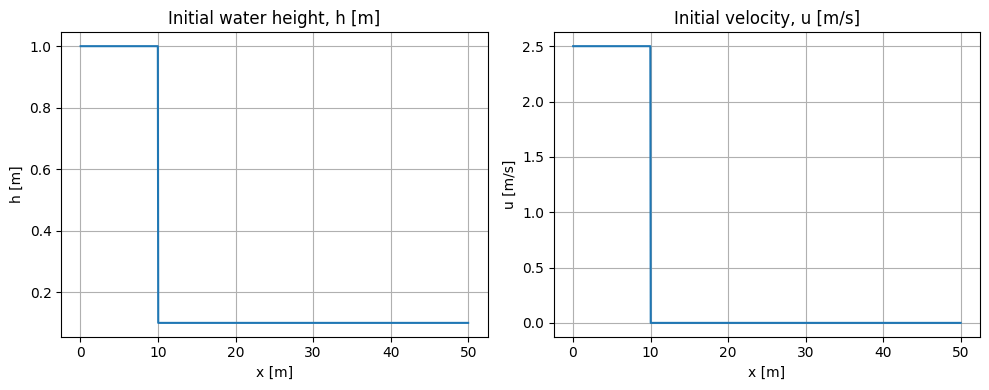

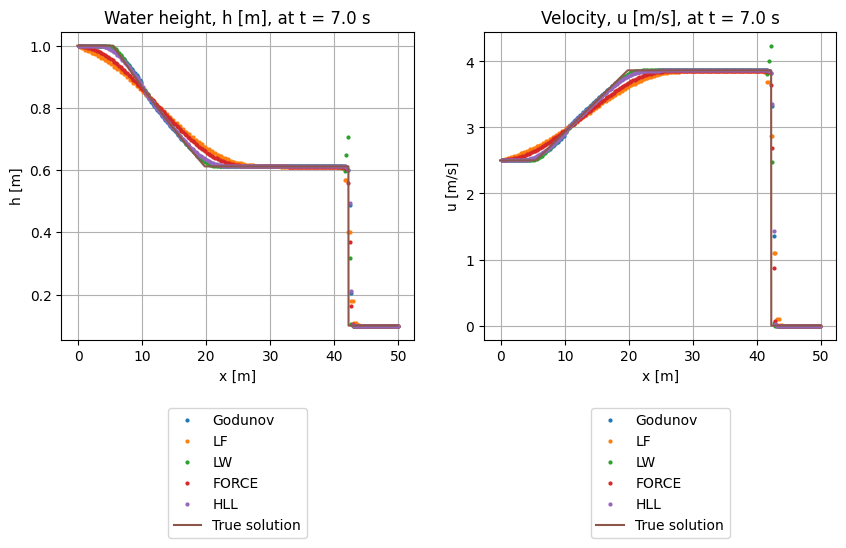

In [101]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 7.0

# Numerical parameters
Nx = 1000 # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 1.0
hR = 0.1
uL = 2.5
uR = 0.0
x0 = 10.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

filename = 'plots/toro_test1_initial.pdf'
plot_initial_data(x, h, u, save, filename)

# Import numerical and true solution from Matlab
mat_data = loadmat('data/torotest1flux1.mat')
xc = mat_data['xc']
h_GOD = mat_data['h']
u_GOD = mat_data['u']
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest1flux2.mat')
h_LF = mat_data['h']
u_LF = mat_data['u']

mat_data = loadmat('data/torotest1flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest1flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest1flux5.mat')
h_HLL = mat_data['h']
u_HLL = mat_data['u']

mat_data = loadmat('data/torotest1flux6.mat')
h_FS = mat_data['h']
u_FS = mat_data['u']

filename = 'plots/toro_test1_final.pdf'
plot_final_data(xc, xexact, h_GOD, h_LF, h_LW, h_FORCE, h_HLL, hexact, u_GOD, u_LF, u_LW, u_FORCE, u_HLL, uexact, tend, save, filename)

## Test 2

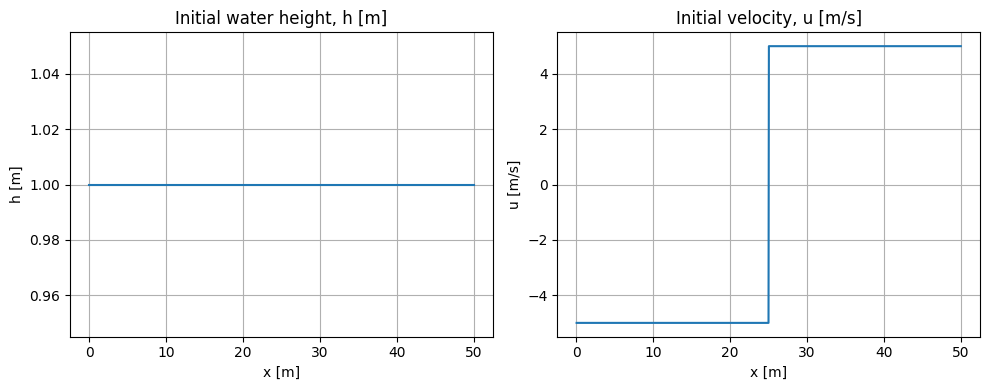

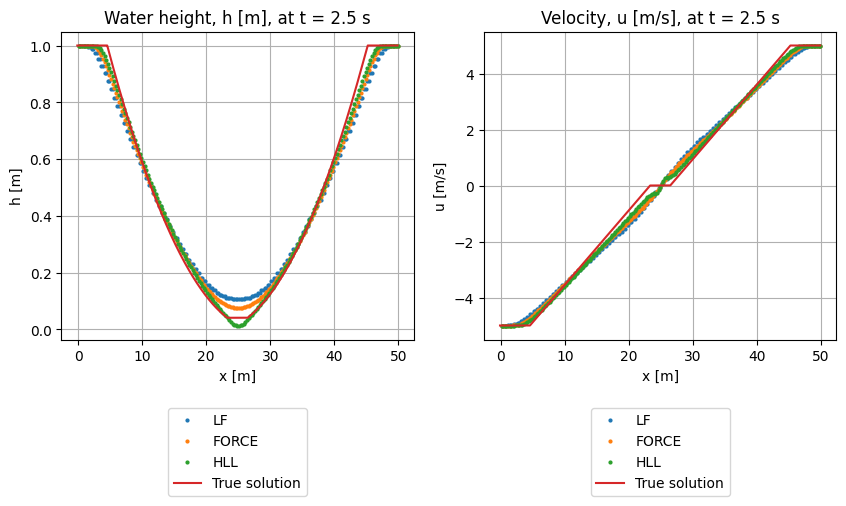

In [102]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 2.5

# Numerical parameters
Nx = 1000 # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 1.0
hR = 1.0
uL = -5.0
uR = 5.0
x0 = 25.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

filename = 'plots/toro_test2_initial.pdf'
plot_initial_data(x, h, u, save, filename)

# Import numerical and true solution from Matlab 
mat_data = loadmat('data/torotest2flux2.mat')
xc = mat_data['xc']
h_LF = mat_data['h']
u_LF = mat_data['u']
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest2flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest2flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest2flux5.mat')
h_HLL = mat_data['h']
u_HLL = mat_data['u']

filename = 'plots/toro_test2_final.pdf'
plot_final_data(xc, xexact, None, h_LF, None, h_FORCE, h_HLL, hexact, None, u_LF, None, u_FORCE, u_HLL, uexact, tend, save, filename)


## Test 3

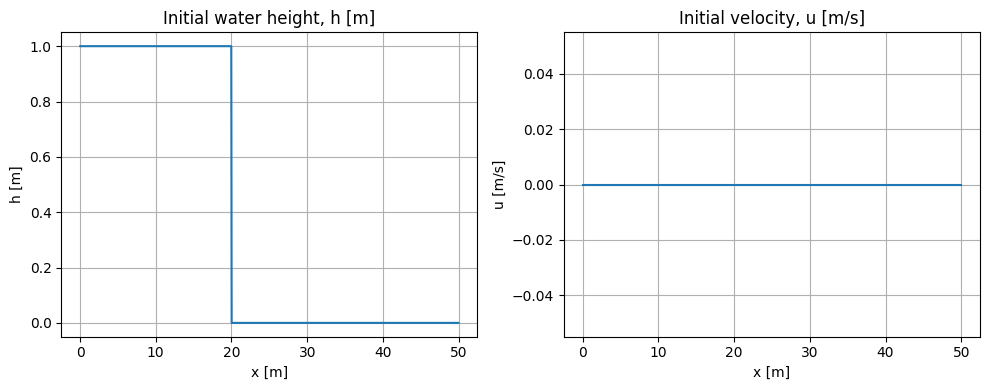

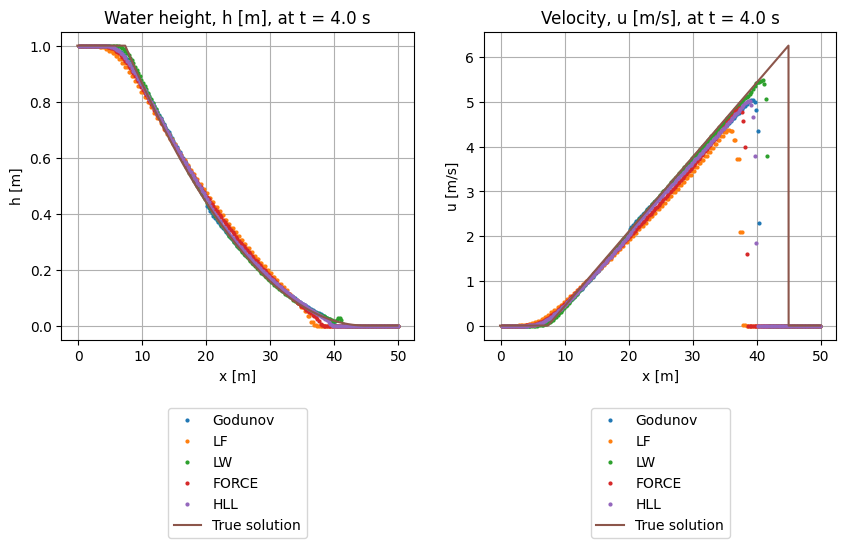

In [103]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 4.0

# Numerical parameters
Nx = 1000  # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 1.0
hR = 0.0
uL = 0.0
uR = 0.0
x0 = 20.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot initial conditions
filename = 'plots/toro_test3_initial.pdf'
plot_initial_data(x, h, u, save, filename)

# Import numerical and true solution from Matlab 
mat_data = loadmat('data/torotest6flux1.mat')  # Load another test, which have hR = 0.0 
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

mat_data = loadmat('data/torotest3flux1.mat')
xc = mat_data['xc']
h_GOD = mat_data['h']
u_GOD = mat_data['u']

mat_data = loadmat('data/torotest3flux2.mat')
h_LF = mat_data['h']
u_LF = mat_data['u']

# Load other numerical solutions
mat_data = loadmat('data/torotest3flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest3flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest3flux5.mat')
h_HLL = mat_data['h']
u_HLL = mat_data['u']

# Plot final state
filename = 'plots/toro_test3_final.pdf'
plot_final_data(xc, xexact, h_GOD, h_LF, h_LW, h_FORCE, h_HLL, hexact, u_GOD, u_LF, u_LW, u_FORCE, u_HLL, uexact, tend, save, filename)

## Test 4

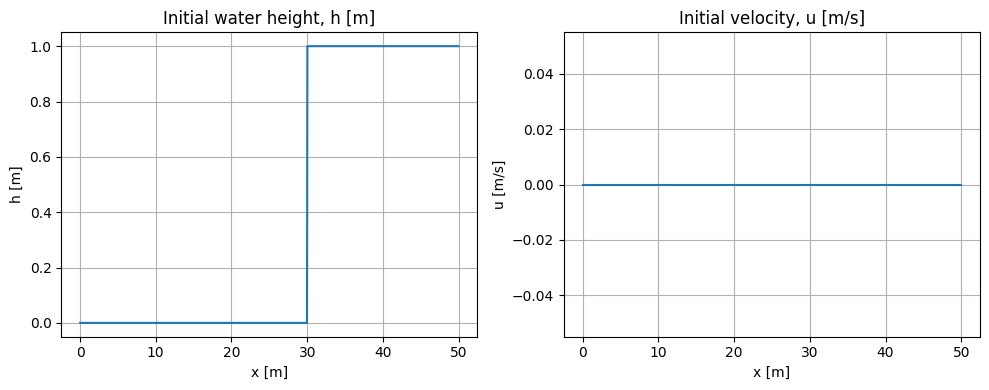

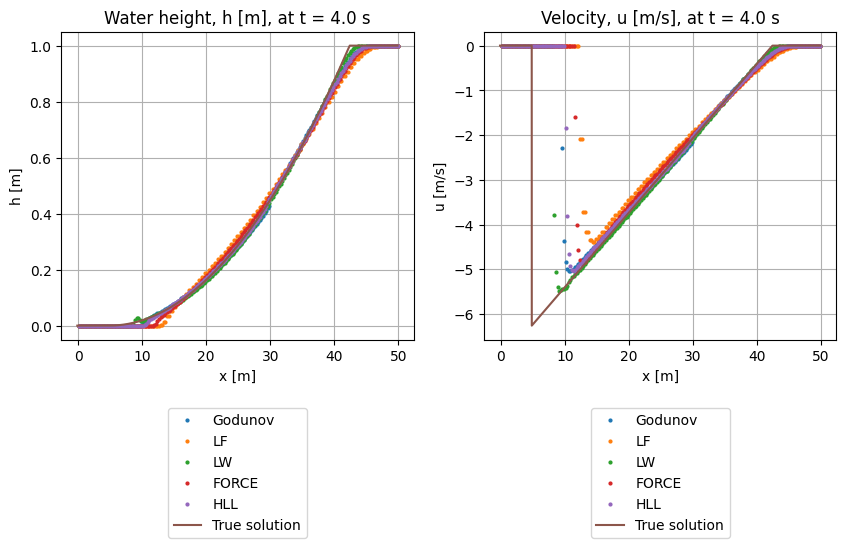

In [104]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 4.0

# Numerical parameters
Nx = 1000  # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 0.0
hR = 1.0
uL = 0.0
uR = 0.0
x0 = 30.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot initial conditions
filename = 'plots/toro_test4_initial.pdf'
plot_initial_data(x, h, u, save, filename)

# Import numerical and true solution from Matlab - Godunov method and split upwind does not work
mat_data = loadmat('data/torotest7flux1.mat')  # Load another test, which have hR = 0.0 
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest4flux1.mat')
xc = mat_data['xc']
h_GOD = mat_data['h']
u_GOD = mat_data['u']

mat_data = loadmat('data/torotest4flux2.mat')
h_LF = mat_data['h']
u_LF = mat_data['u']

mat_data = loadmat('data/torotest4flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest4flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest4flux5.mat')
h_HLL = mat_data['h']
u_HLL = mat_data['u']

# Plot final state
filename = 'plots/toro_test4_final.pdf'
plot_final_data(xc, xexact, h_GOD, h_LF, h_LW, h_FORCE, h_HLL, hexact, u_GOD, u_LF, u_LW, u_FORCE, u_HLL, uexact, tend, save, filename)

## Test 5

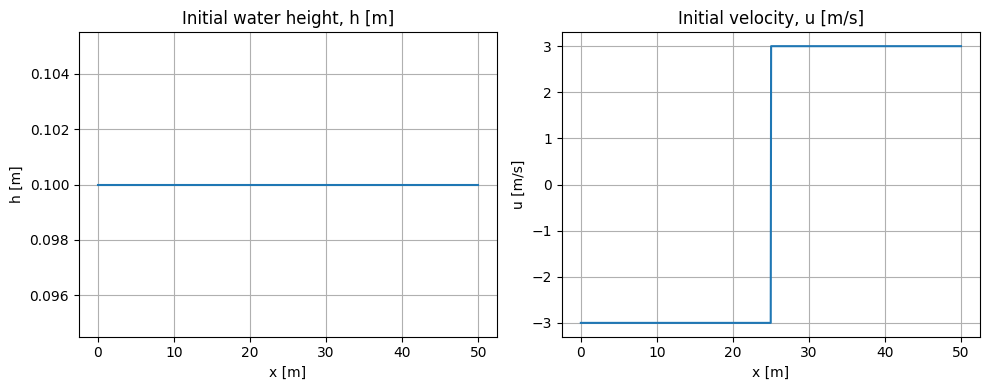

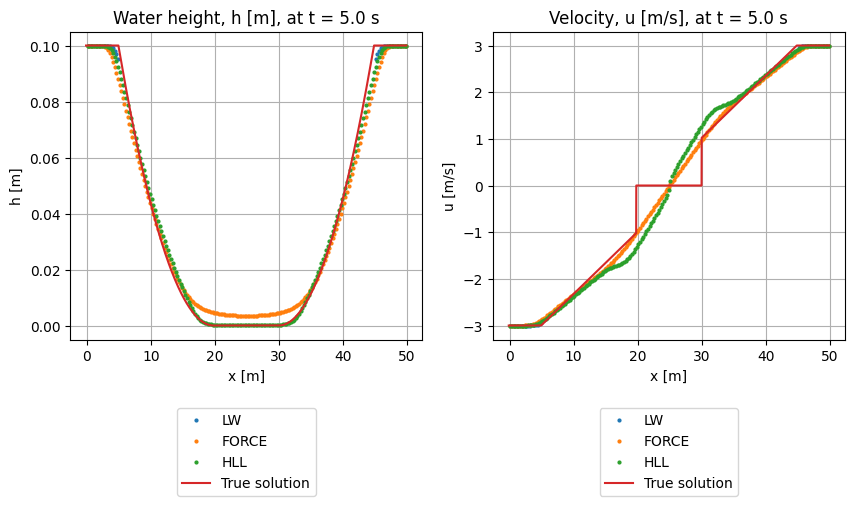

In [105]:
# Physical parameters
xL = 0
xR = 50
t = 0
tend = 5.0

# Numerical parameters
Nx = 1000 # the number of the cell-centers
dx = (xR - xL) / Nx  # distance between the mesh points
x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)

# Initial conditions
h = np.zeros(Nx)
u = np.zeros(Nx)
hL = 0.1
hR = 0.1
uL = -3.0
uR = 3.0
x0 = 25.0

# Define initial water height and velocity
h = np.where(x < x0, hL, hR)           
u = np.where(x < x0, uL, uR)

# Plot initial conditions
filename = 'plots/toro_test5_initial.pdf'
plot_initial_data(x, h, u, save, filename)

# Import numerical and true solution from Matlab - Godunov method and split upwind does not work
mat_data = loadmat('data/torotest5flux2.mat')
xc = mat_data['xc']
h_LF = mat_data['h']
u_LF = mat_data['u']
xexact = mat_data['xexact']
hexact = mat_data['hexact']
uexact = mat_data['uexact']

# Load other numerical solutions
mat_data = loadmat('data/torotest5flux3.mat')
h_LW = mat_data['h']
u_LW = mat_data['u']

mat_data = loadmat('data/torotest5flux4.mat')
h_FORCE = mat_data['h']
u_FORCE = mat_data['u']

mat_data = loadmat('data/torotest5flux5.mat')
h_HLL = mat_data['h']
u_HLL = mat_data['u']

# Plot final state
filename = 'plots/toro_test5_final.pdf'
plot_final_data(xc, xexact, None, None, h_LW, h_FORCE, h_HLL, hexact, None, None, u_LW, u_FORCE, u_HLL, uexact, tend, save, filename)

# 2D Dam break problem

### Functions
The MUSCL-Hancock scheme for the 2D SWE with the Rusanov numerical flux.

### Idealised 2D dam break

In [93]:
# Initialize
save_results = 0
save_plots = 0 
N = 64

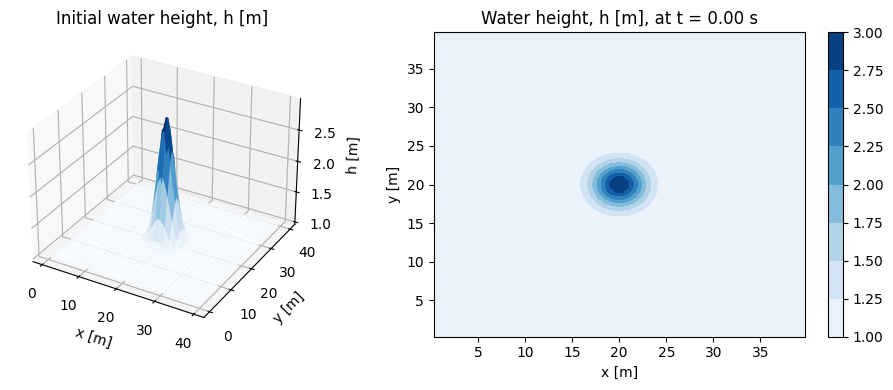

In [94]:
# Global constants
g = 9.81  # gravity
Nx = N
Ny = Nx
xL, xR = 0, 40
yL, yR = 0, 40
t = 0
tend = 15
CFL = 0.9

dx = (xR - xL) / Nx
dy = (yR - yL) / Ny

x = np.linspace(xL + dx / 2, xR - dx / 2, Nx)
y = np.linspace(yL + dy / 2, yR - dy / 2, Ny)

# Center
xc = 20
yc = 20

# Radius
R = 2.5

# Initial conditions for the water height
Q = np.zeros((3, Nx, Ny))
Qnew = np.copy(Q)

# Define initial condition
ic = 2

if ic == 1:
    for i in range(Nx):
        for j in range(Ny):
            r = np.sqrt((x[i] - xc)**2 + (y[j] - yc)**2)
            if r < R:
                Q[0, i, j] = 2.5
            else:
                Q[0, i, j] = 0.5

# Initial condition Gauss function
sigma = 2
if ic == 2:
    for i in range(Nx):
        for j in range(Ny):
            Q[0, i, j] = 1.0 + 2 * np.exp(-((x[i] - xc)**2 + (y[j] - yc)**2) / (2 * sigma**2))

cmap = 'Blues'
# Plot the initial data in 3d and in contour
fig = plt.figure(figsize=(10, 4))

# 3D Surface plot on the first subplot
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(x, y)
ax1.plot_surface(X, Y, Q[0, :, :], cmap=cmap)
ax1.set_title(f'Initial water height, h [m]')
ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax1.set_zlabel('h [m]')

# Contour plot on the second subplot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Q[0, :, :], cmap=cmap)
fig.colorbar(contour, ax=ax2)
ax2.set_title(f'Water height, h [m], at t = {t:.2f} s')
ax2.set_xlabel('x [m]')
ax2.set_ylabel('y [m]')

# Show the combined plot
plt.tight_layout()
plt.show()

In [95]:
# Start timer
start_time = time.time()

Q_all, t_all = solve_2D_SWE_FVM(Q, Qnew, t, tend, CFL, dx, dy, Nx, Ny)
#Q_all, t_all = solve_2D_SWE_FVM_constant_dt(Q, Qnew, t, tend, CFL, dx, dy, Nx, Ny)

# End timer
end_time = time.time()

# Print the time taken
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time:.2f} seconds')

t = 0.052
t = 0.104
t = 0.156
t = 0.207
t = 0.257
t = 0.307
t = 0.357
t = 0.407
t = 0.458
t = 0.508
t = 0.559
t = 0.610
t = 0.662
t = 0.715
t = 0.768
t = 0.822
t = 0.876
t = 0.931
t = 0.986
t = 1.042
t = 1.099
t = 1.156
t = 1.214
t = 1.272
t = 1.330
t = 1.389
t = 1.449
t = 1.508
t = 1.569
t = 1.629
t = 1.690
t = 1.752
t = 1.813
t = 1.875
t = 1.938
t = 2.001
t = 2.064
t = 2.127
t = 2.191
t = 2.255
t = 2.320
t = 2.384
t = 2.449
t = 2.514
t = 2.580
t = 2.646
t = 2.712
t = 2.778
t = 2.845
t = 2.912
t = 2.979
t = 3.046
t = 3.113
t = 3.181
t = 3.249
t = 3.317
t = 3.386
t = 3.454
t = 3.523
t = 3.592
t = 3.661
t = 3.731
t = 3.801
t = 3.870
t = 3.940
t = 4.010
t = 4.081
t = 4.151
t = 4.222
t = 4.293
t = 4.364
t = 4.436
t = 4.508
t = 4.580
t = 4.652
t = 4.724
t = 4.797
t = 4.870
t = 4.942
t = 5.014
t = 5.086
t = 5.157
t = 5.228
t = 5.298
t = 5.369
t = 5.439
t = 5.509
t = 5.579
t = 5.648
t = 5.718
t = 5.787
t = 5.856
t = 5.925
t = 5.994
t = 6.063
t = 6.132
t = 6.201
t = 6.270
t = 6.339
t = 6.407


In [96]:
# Save the training time
# Specify folder path (create the folder if it doesn't exist)
folder_path = 'C:/Users/Matteo/Shallow-Water-Equations/saved_results'
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

# Save the training time
if save_results:
    file_path = os.path.join(folder_path, f'2D_FVM_N={Nx}_time_{tend}.txt')
    with open(file_path, 'w') as f:
        f.write(f"{elapsed_time:.2f}") # Save with 2 decimals


In [97]:
# Save as .h5 file
if 0:
    filename = f'dataFNO/toro2D_N={Nx}_t={tend}_constant_dt.h5'
    with h5py.File(filename, 'w') as file:
        file.create_dataset('Q_all', data=Q_all)
        file.create_dataset('t_all', data=t_all)
        file.create_dataset('x', data=x)
        file.create_dataset('y', data=y)
    print(f'Data saved to {filename}')


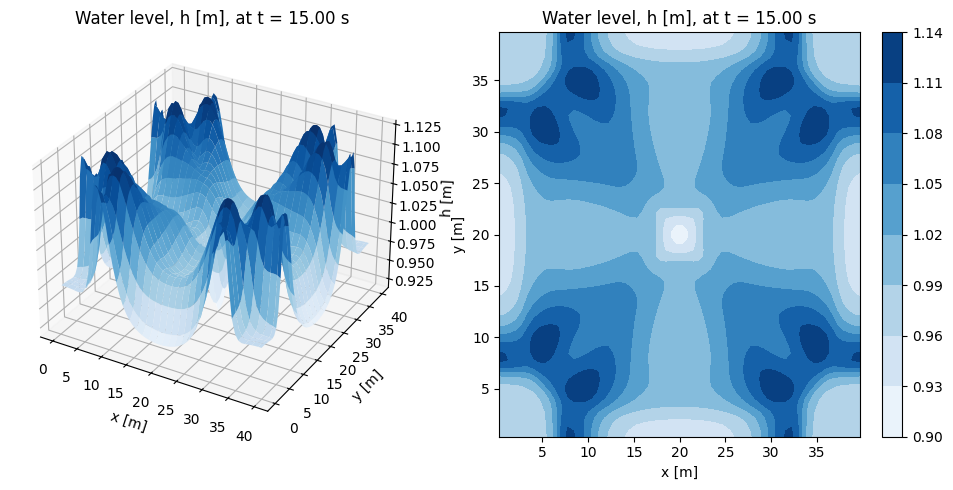

In [98]:
save = 0

# Prepare grid
X, Y = np.meshgrid(x, y)

from matplotlib import gridspec

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2])  # Adjust width ratios: [2, 1] makes the first plot twice as wide as the second

# First plot (3D)
ax1 = fig.add_subplot(gs[0], projection='3d')
surf = ax1.plot_surface(X, Y, Q_all[-1][0, :, :], cmap=cmap)
ax1.set_title(f'Water level, h [m], at t = {tend:.2f} s')
ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax1.set_zlabel('h [m]')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Second plot (Contour)
ax2 = fig.add_subplot(gs[1])
contour = ax2.contourf(X, Y, Q_all[-1][0, :, :], cmap=cmap)
fig.colorbar(contour, ax=ax2)
ax2.set_title(f'Water level, h [m], at t = {tend:.2f} s')
ax2.set_xlabel('x [m]')
ax2.set_ylabel('y [m]')

plt.tight_layout()

# Save figure
if save:
    filename = f'plots/toro2D_t={tend}.pdf'
    plt.savefig(filename, format='pdf')

plt.show()

### Plot on a sphere

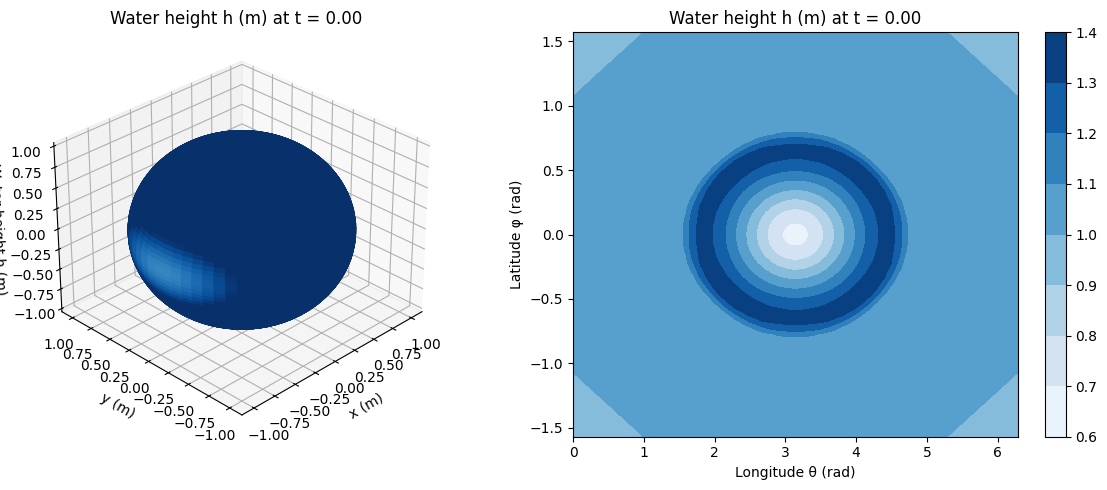

In [99]:
## Wrap on a sphere
idx = 28

# Define grid in lat/lon space (latitude φ, longitude θ)
phi = np.linspace(-np.pi/2, np.pi/2, Q.shape[1])  # Latitude range from -90° to 90°
theta = np.linspace(0, 2*np.pi, Q.shape[2])  # Longitude range from 0° to 360°
cmap = 'Blues'

# Convert to meshgrid for spherical coordinates
phi, theta = np.meshgrid(phi, theta)

# Convert to Cartesian coordinates for plotting on the sphere
r = 1  # Radius of the sphere (can be adjusted)
X_sphere = r * np.cos(phi) * np.cos(theta)  # X coordinate
Y_sphere = r * np.cos(phi) * np.sin(theta)  # Y coordinate
Z_sphere = r * np.sin(phi)  # Z coordinate

# Plot the final data in 3D and in contour
fig = plt.figure(figsize=(12, 5))

# 3D Surface plot on the first subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_sphere, Y_sphere, Z_sphere, facecolors=plt.cm.Blues(Q_all[idx][0, :, :]), rstride=1, cstride=1, antialiased=True, shade=False)
ax1.set_title(f'Water height h (m) at t = {t:.2f}')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.view_init(30, 45+180)
ax1.set_zlabel('Water height h (m)')

# Contour plot on the second subplot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(theta, phi, Q_all[idx][0, :, :], cmap=cmap)
fig.colorbar(contour, ax=ax2)
ax2.set_title(f'Water height h (m) at t = {t:.2f}')
ax2.set_xlabel('Longitude θ (rad)')
ax2.set_ylabel('Latitude φ (rad)')

plt.tight_layout()
plt.show()



### Make animation

In [100]:
n = len(Q_all)

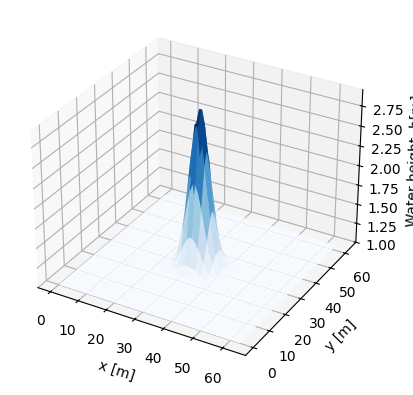

In [101]:
# Make animation
if 1:
    # Assuming Nx and Ny are the dimensions of your data
    Nx, Ny = Q_all[0][0].shape
    x = np.linspace(0, Nx-1, Nx)
    y = np.linspace(0, Ny-1, Ny)
    X, Y = np.meshgrid(x, y)

    # Set up the figure and 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlim(np.min(Q_all[0][0]), np.max(Q_all[0][0]))
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('Water height, h[m]')

    # Initial surface plot
    surf = ax.plot_surface(X, Y, Q_all[0][0], cmap=cmap)

    # Update function for the animation
    def update(frame):
        ax.clear()
        ax.set_zlim(np.min(Q_all[0][0]), np.max(Q_all[0][0]))
        ax.set_xlabel('x [m]')
        ax.set_ylabel('y [m]')
        ax.set_zlabel('Water height, h[m]')
        ax.set_title(f'Water height, h[m], at timestep {frame}/{n}')
        surf = ax.plot_surface(X, Y, Q_all[frame][0], cmap=cmap)
        return [surf]

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=len(Q_all), interval=100)

    # Display the animation
    plt.show()


In [90]:
# Save animation
ani.save(f'animations/toro2D_FVM_16012025_N={Nx}_t={tend}.html', writer='html')
dpi = 200
ani.save(f'animations/toro2D_FVM_16012025_N={Nx}_t={tend}.gif', writer='pillow', dpi=dpi)

### Scalability 

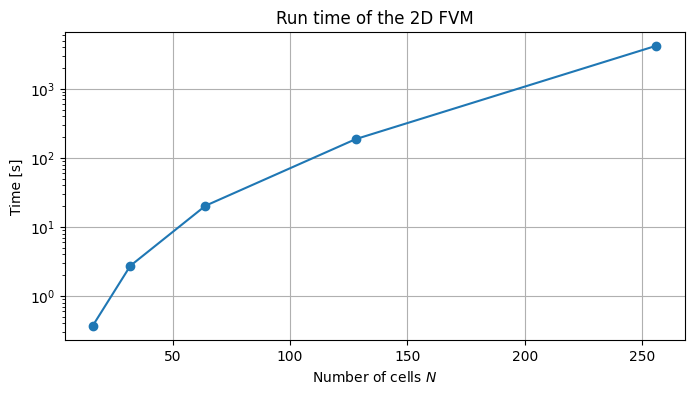

In [91]:
# Scalability issues
times = [(16, 0.37), (32, 2.73), (64, 20.23), (128, 186.83), (256, 4205.45)]

# Plot the scalability
plt.figure(figsize=(8, 4))
plt.plot(*zip(*times), marker='o')
plt.grid()
plt.xlabel('Number of cells $N$')
plt.ylabel('Time [s]')
plt.title('Run time of the 2D FVM')
plt.yscale('log')

if save_plots:
    plt.savefig('plots/scalability_FVM_2D.pdf', format='pdf')

plt.show()